### Tetracutinase STEM simulation results

- From 5kV to 80kV

In [1]:
# Numeric operations
import numpy as np

# Visualization / Plotting
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Scientific image processing library:
import skimage
from skimage import io
from skimage import filters
from skimage.morphology import disk
from skimage.feature import blob_log
from skimage import data
from skimage import measure

from scipy.ndimage import gaussian_filter
import scipy.io as sio

import h5py

# Ensure that images are rendered in this notebook:
%matplotlib inline

In [155]:
## importing .mat files
f = h5py.File('emdSTEM_5kv.mat','r')
# list(f['emdSTEM5'].keys())

In [86]:
#parse each mat structure into a python data object
class simdata(object):
    E0 = ''
    atoms = ''
    cellDim =''
    detectorAngles = ''
    stack = ''
    pixelSize =''
    
    def __init__(self, E0, atoms, cellDim, detectorAngles, stack, pixelSize):
        self.E0 = E0
        self.atoms = atoms
        self.cellDim = cellDim
        self.detectorAngles = detectorAngles
        self.stack = stack
        self.pixelSize = pixelSize

In [88]:
p = simdata('','','','','','')
p.E0 = (f['emdSTEM5/E0'])
p.atoms = np.array(f['emdSTEM5/atoms'])
p.cellDim = np.array(f['emdSTEM5/cellDim'])
p.detectorAngles=np.mat(f['emdSTEM5/detectorAngles'])
p.stack=np.array(f['emdSTEM5/stack'])
p.pixelSize = (f['emdSTEM5/pixelSize'])

In [166]:
p.detectorAngles[10]*1000 , p.E0[0]/1000 , p.pixelSize[1]

(matrix([[21.]]), array([5.]), array([0.25201613]))

In [146]:
# total_image = np.mean(p.stack[:,:,:],axis=0)
# normTotal = total_image.max()
# normTotal

### Plotting ABF vs ADF images

E0 = 5kV

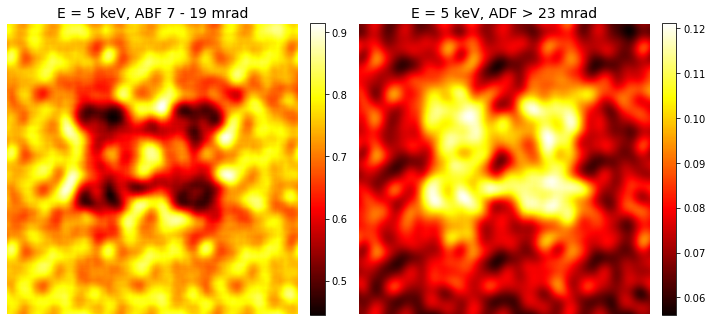

In [148]:
ABF = np.mean(p.stack[3:11,:,:],axis=0)
ADF = np.mean(p.stack[11:,:,:],axis=0)
normTotal = (ADF+ABF).max()

fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10, 6))

plt_handle = ax[0].imshow(ABF/normTotal, cmap='hot')
ax[0].set_title(f'E = {int(p.E0[0]/1000)} keV, ABF {int(p.detectorAngles[3]*1000)} - {int(p.detectorAngles[9]*1000)} mrad', fontSize = 14)
ax[0].axis('off')
cbar = plt.colorbar(plt_handle, ax=ax[0], fraction=0.046, pad=0.04)


plt_handle = ax[1].imshow(ADF/normTotal, cmap='hot')
ax[1].set_title(f'E = {int(p.E0[0]/1000)} keV, ADF > {int(p.detectorAngles[11]*1000)} mrad', fontSize = 14)
ax[1].axis('off')
cbar = plt.colorbar(plt_handle, ax=ax[1], fraction=0.046, pad=0.04)

# plt.savefig('ABF-ADF_5kV.png')
fig.tight_layout()

### Add noise to images

- Dose: integer value indicating the number of electrons per Angstrom squared illuminating the sample.
- pixel_size: Image pixel size in Angstrom.

In [84]:
def add_noise(img,dose,pixel_size):
    doseperpixel = dose*(pixel_size[0]*pixel_size[1])
    mnoise = np.random.poisson(doseperpixel*img)
        
    return mnoise

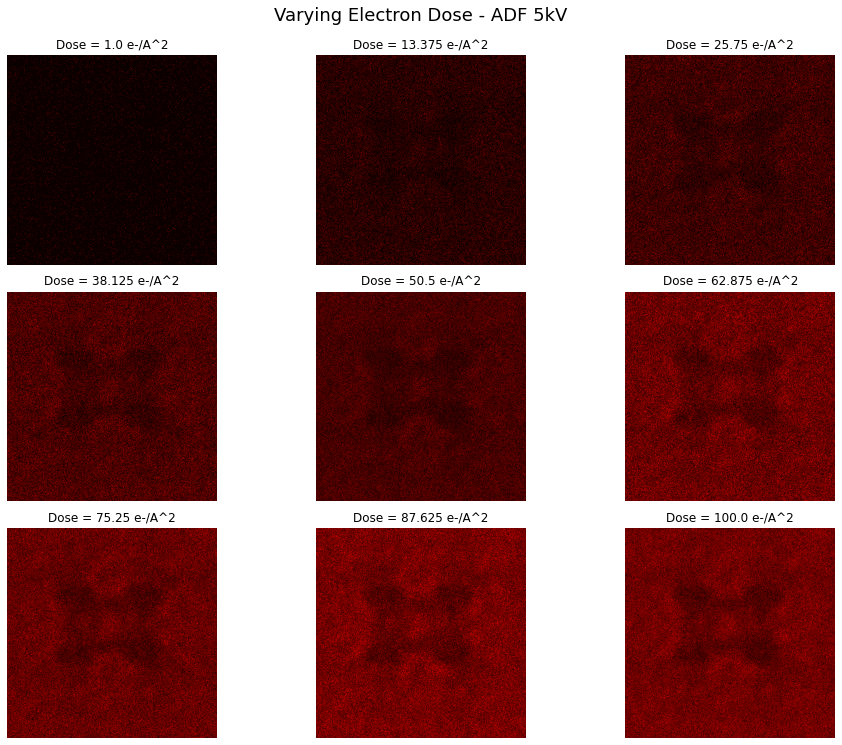

In [167]:
dose_values = np.linspace(1, 100, num=9)
pixel_size = p.pixelSize
img = ABF

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10), sharex=True, sharey=True)

for axis, edose in zip(axes.flat, dose_values):
    mnoise = add_noise(img,edose,pixel_size)
    im = axis.imshow(mnoise/mnoise.max(), cmap='hot')
#     cbar=plt.colorbar(im,orientation='vertical')
    axis.set_title('Dose = {} e-/A^2'.format(edose))
    axis.axis('off')


fig.suptitle('Varying Electron Dose - ADF 5kV', fontsize=18, y=1.03)
# plt.savefig('varying_dose_ABF_5kV.png')
fig.tight_layout()

### Plot individual images

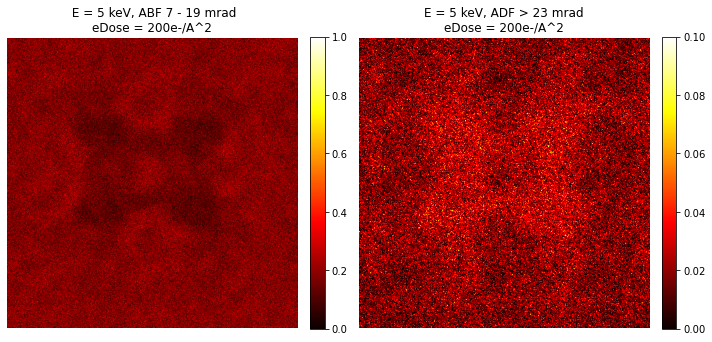

In [168]:
eDose = 200
abf_noise = add_noise(ABF,eDose,p.pixelSize)
adf_noise = add_noise(ADF,eDose,p.pixelSize)
norm = (abf_noise+adf_noise).max()


fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10, 6))

plt_handle = ax[0].imshow(abf_noise/norm, cmap='hot',vmax = 1)
ax[0].set_title(f' E = {int(p.E0[0]/1000)} keV, ABF {int(p.detectorAngles[3]*1000)} - {int(p.detectorAngles[9]*1000)} mrad'
                +"\n"+ f'eDose = {eDose}e-/A^2', fontSize = 12)
ax[0].axis('off')
cbar = plt.colorbar(plt_handle, ax=ax[0], fraction=0.046, pad=0.04)


plt_handle = ax[1].imshow(adf_noise/norm, cmap='hot', vmax = 0.1)
ax[1].set_title(f'E = {int(p.E0[0]/1000)} keV, ADF > {int(p.detectorAngles[11]*1000)} mrad'
                +"\n"+ f'eDose = {eDose}e-/A^2', fontSize = 12)

ax[1].axis('off')
cbar = plt.colorbar(plt_handle, ax=ax[1], fraction=0.046, pad=0.04)

plt.savefig('Dose500_ABF-ADF_5kV.png')
fig.tight_layout()